In [8]:
from google.cloud import bigquery
import pandas as pd
#import pandas_gbp
import matplotlib.pyplot as plt
%matplotlib inline

def fetch_covid19_cases():
    # Construct a BigQuery client object.
    client = bigquery.Client()
    query = """
        SELECT *, 
        FROM `bigquery-public-data.covid19_jhu_csse.confirmed_cases`
    """
    df_confirmed_cases = client.query(query).to_dataframe()
    df_confirmed_cases.drop(['latitude', 'longitude', 'location_geom'], axis=1, inplace=True)

    df_confirmed_cases['province_state'] = df_confirmed_cases['province_state'].fillna('ALL')
    df_confirmed_cases=df_confirmed_cases[df_confirmed_cases['province_state'] == 'ALL']
    df_confirmed_cases.rename(columns={'country_region': 'country'}, inplace=True)
    df_confirmed_cases = df_confirmed_cases.set_index('country')
    df_confirmed_cases.drop(['province_state'], axis=1, inplace=True)
    return df_confirmed_cases

def fetch_population():
    client = bigquery.Client()
    query = """
        SELECT country_code, country_name as country, midyear_population as population FROM `bigquery-public-data.census_bureau_international.midyear_population`
        where year = EXTRACT(year from (CURRENT_DATE()))
        order by midyear_population desc
    """
    df_world_population = client.query(query).to_dataframe()
    df_world_population = df_world_population.set_index('country')
    return df_world_population

In [9]:
df_confirmed_cases = fetch_covid19_cases()
df_world_population = fetch_population()

In [10]:
#pd.merge(df_confirmed_cases, df_world_population, on=['country' ,'country'])
df_confirmed_cases_popl = df_confirmed_cases.join(df_world_population, how='outer')

In [11]:
df_confirmed_cases_popl.loc['Netherlands']

_1_22_20                  0
_1_23_20                  0
_1_24_20                  0
_1_25_20                  0
_1_26_20                  0
                   ...     
_5_22_20              44888
_5_23_20              45064
_5_24_20              45236
country_code             NL
population      1.72804e+07
Name: Netherlands, Length: 126, dtype: object

In [12]:
print(df_world_population.loc['United States'])
print(df_world_population.loc['Serbia'])
df_world_population.loc['Netherlands']
df_confirmed_cases_popl.loc['United States']


country_code           US
population      334503458
Name: United States, dtype: object
country_code         RI
population      7012165
Name: Serbia, dtype: object


_1_22_20                NaN
_1_23_20                NaN
_1_24_20                NaN
_1_25_20                NaN
_1_26_20                NaN
                   ...     
_5_22_20                NaN
_5_23_20                NaN
_5_24_20                NaN
country_code             US
population      3.34503e+08
Name: United States, Length: 126, dtype: object

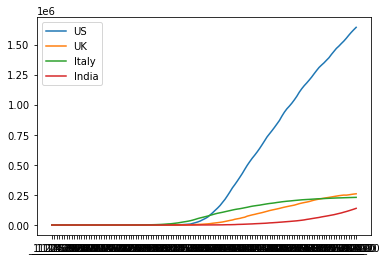

In [13]:
fig, ax = plt.subplots()
ax.plot(df_confirmed_cases.columns, df_confirmed_cases.loc['US'], label="US")
ax.plot(df_confirmed_cases.columns, df_confirmed_cases.loc['United Kingdom'], label="UK")
ax.plot(df_confirmed_cases.columns, df_confirmed_cases.loc['Italy'], label="Italy")
#ax.plot(df_confirmed_cases.columns, df_confirmed_cases.loc['China'], label="China")
ax.plot(df_confirmed_cases.columns, df_confirmed_cases.loc['India'], label="India")
ax.legend()
plt.show()

In [14]:
#df_confirmed_cases.index.tolist()